In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline

### Get fit data ready

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=399999):
    try:
        data = pd.read_csv(given_fname,index_col=False,engine='python',nrows=lim)
        data.to_csv(output_fname)
    except:
        content = []
        count = 1

        with open(given_fname, 'r') as fr:
            for line in fr:
                if count <= lim:
                    #print(type(line), line)
                    content.append(line)
                    count += 1
        with open(output_fname, 'w') as fw:
            for line in content:
                # print(type(line), line)
                fw.write(line)

        data = pd.read_csv(output_fname, index_col=False,encoding= res_encoding,engine='python')

    return data

In [3]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
qso_train_drop = qso_train_partial[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
qso_train_drop = qso_train_drop[(qso_train_drop['r_LSST_magerr']>0.2)&(qso_train_drop['i_LSST_magerr']>0.2)]
redshifts26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 22.0]
redshifts26 = redshifts26[redshifts26['z_LSST_mag'] < 26.0]
redshifts26 = redshifts26['z']
qso_train_drop = qso_train_drop.drop(columns=['z', 'r_LSST_magerr', 'i_LSST_magerr'])
print('qso_train_catalog_z.csv partial data description: ')
qso_train_drop.describe()

qso_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000
mean,28.576193,26.616020,24.340320,24.201112,24.264969,24.132527
std,1.218340,1.654428,2.009015,2.089360,2.112093,2.108081
min,26.672280,23.064283,18.489759,17.989148,17.800595,17.633615
25%,27.689657,25.314514,23.136710,22.977195,23.069490,22.937156
50%,28.366448,26.540555,24.371926,24.306130,24.363508,24.192066
75%,29.189413,27.668971,25.789820,25.697926,25.766767,25.595761
max,38.902328,36.769079,32.115011,32.168396,32.742341,33.953075


(array([1986., 1725., 1511., 1102.,   95.,   74.,  366.,  489.,  380.,
         271.]),
 array([6.0001027 , 6.15004544, 6.29998818, 6.44993092, 6.59987366,
        6.7498164 , 6.89975914, 7.04970188, 7.19964462, 7.34958736,
        7.4995301 ]),
 <BarContainer object of 10 artists>)

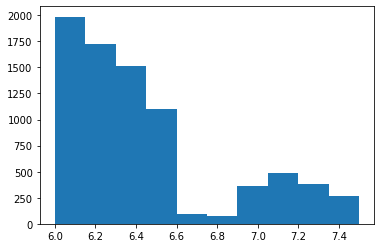

In [4]:
plt.hist(redshifts26)

In [5]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv', 599999)
mlt_train_drop = mlt_train_partial[['r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop[(mlt_train_drop['r_LSST_magerr']>0.2)&(mlt_train_drop['i_LSST_magerr']>0.2)]
mlt_train_drop = mlt_train_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('mlt_train_catalog_z.csv partial data description: ')
mlt_train_drop.describe()

mlt_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000
mean,27.846360,26.406950,24.814468,24.240156,23.941957,23.954919
std,0.866560,0.814595,0.652294,0.636044,0.633295,0.639822
min,26.565172,24.640153,22.966413,22.249321,21.884903,21.705643
25%,27.248318,25.848575,24.336096,23.782861,23.500746,23.511528
50%,27.631539,26.262382,24.722558,24.157091,23.877018,23.890470
75%,28.184954,26.792510,25.207169,24.619578,24.324022,24.337251
max,38.215437,36.198974,28.369839,27.735964,27.180561,27.305963


In [6]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
galaxies_patch8789_drop = galaxies_patch8789_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop[(galaxies_patch8789_drop['r_LSST_magerr']>0.2)&(galaxies_patch8789_drop['i_LSST_magerr']>0.2)]
galaxies_patch8789_drop = galaxies_patch8789_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_drop.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000
mean,28.112741,27.507701,27.330679,27.226355,27.160891,27.154280
std,0.888656,0.950758,0.788433,0.796900,0.827853,0.977009
min,26.647539,25.462982,25.152190,24.748167,24.475726,24.258516
25%,27.518918,26.883531,26.837638,26.737179,26.657671,26.557470
50%,27.920273,27.314756,27.248012,27.172407,27.118375,27.041903
75%,28.465759,27.895376,27.710084,27.634895,27.594613,27.601858
max,40.029429,39.261958,39.647494,40.707497,38.204669,38.379259


In [7]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
galaxies_patch8786_drop = galaxies_patch8786_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop[(galaxies_patch8786_drop['r_LSST_magerr']>0.2)&(galaxies_patch8786_drop['i_LSST_magerr']>0.2)]
galaxies_patch8786_drop = galaxies_patch8786_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_drop.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000
mean,28.100850,27.494201,27.312886,27.205306,27.141588,27.131087
std,0.886176,0.952283,0.787836,0.803831,0.842035,0.981599
min,26.573603,25.553776,25.107279,24.705397,24.460871,24.280885
25%,27.507437,26.871509,26.818015,26.714655,26.633409,26.535319
50%,27.905555,27.298765,27.235464,27.156027,27.102194,27.024863
75%,28.452905,27.883030,27.697065,27.620381,27.584424,27.588149
max,40.812877,40.422024,37.436853,38.037623,37.411129,37.630643


In [8]:
print(qso_train_drop.head(), len(qso_train_drop))
print(np.where(np.isnan(qso_train_drop)))
print(len(mlt_train_drop))
print(np.where(np.isnan(mlt_train_drop)))
print(len(galaxies_patch8789_drop))
print(np.where(np.isnan(galaxies_patch8789_drop)))
print(len(galaxies_patch8786_drop))
print(np.where(np.isnan(galaxies_patch8786_drop)))

      i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  F_WFI_mag
1281   27.955360   23.388638  18.489759  18.079326  18.072496  18.058461
1307   27.672539   23.363093  18.584296  18.061424  18.042225  18.025975
1329   28.051408   23.778138  18.601250  18.008757  17.881144  17.780953
1344   27.538063   23.893443  18.537558  18.022577  17.954901  17.866836
1350   27.028989   24.008393  18.589781  18.074683  17.986391  17.954758 20759
(array([], dtype=int64), array([], dtype=int64))
40215
(array([], dtype=int64), array([], dtype=int64))
166180
(array([], dtype=int64), array([], dtype=int64))
156947
(array([], dtype=int64), array([], dtype=int64))


In [9]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

In [10]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [11]:
qso_train_26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 24.0]
qso_train_26 = qso_train_26[qso_train_26['z_LSST_mag'] < 26.0]
print(len(qso_train_26))
mlt_train_26 = mlt_train_drop[mlt_train_drop['z_LSST_mag'] > 24.0]
mlt_train_26 = mlt_train_26[mlt_train_26['z_LSST_mag'] < 26.0]
print(len(mlt_train_26))
galaxies_patch8789_26 = galaxies_patch8789_drop[galaxies_patch8789_drop['z_LSST_mag'] > 24.0]
galaxies_patch8789_26 = galaxies_patch8789_26[galaxies_patch8789_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8789_26))
galaxies_patch8786_26 = galaxies_patch8786_drop[galaxies_patch8786_drop['z_LSST_mag'] > 24.0]
galaxies_patch8786_26 = galaxies_patch8786_26[galaxies_patch8786_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8786_26))

7514
13791
778
753


In [12]:
contaminants_26 = pd.concat([mlt_train_26, galaxies_patch8789_26, galaxies_patch8786_26], ignore_index=True)
data_train_26 = pd.concat([qso_train_26, contaminants_26], ignore_index=True)
X_drop_26 = data_train_26[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop_26 = data_train_26['label']

## KNN filters

In [47]:
# 1a
# x: z_LSST_mag-J_WFI_mag
# y: Y_WFI_mag-H_WFI_mag
# best score:  0.9881756756756758
filter1a = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=3)
features1a = [X_drop_26['z_LSST_mag']-X_drop_26['J_WFI_mag'], X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag']]
X1a = np.array(features1a).transpose()

filter1a.fit(X1a, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=3)

In [48]:
# 1b
# x: Y - H 
# y: i - H
# best score:  0.9938063063063063
filter1b = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=5)
features1b = [X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['H_WFI_mag']]
X1b = np.array(features1b).transpose()

filter1b.fit(X1b, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=5)

In [49]:
# 1c 
# x: z - H
# y: J - H
# best score:  0.9463213213213213
filter1c = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=36, leaf_size=3, weights='uniform', p=5)
features1c = [X_drop_26['z_LSST_mag']-X_drop_26['H_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1c = np.array(features1c).transpose()

filter1c.fit(X1c, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=36, p=5)

In [50]:
# 1d
# x: z_LSST_mag-Y_WFI_mag
# y: i_LSST_mag-F_WFI_mag
# best score:  0.9678428428428428
filter1d = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=45, leaf_size=3, weights='uniform', p=5)
features1d = [X_drop_26['z_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['F_WFI_mag']]
X1d = np.array(features1d).transpose()

filter1d.fit(X1d, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=45, p=5)

In [51]:
# 1e
# Y - J
# J - H
# best score: deleted, assume 0.95
filter1e = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1e = [X_drop_26['Y_WFI_mag']-X_drop_26['J_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1e = np.array(features1e).transpose()

filter1e.fit(X1e, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [52]:
# 1f
# x: i - Y
# y: J - H
# best score:  0.9161036036036035
filter1f = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1f = [X_drop_26['i_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1f = np.array(features1f).transpose()

filter1f.fit(X1f, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [39]:
# 1a
# x: z_LSST_mag-J_WFI_mag
# y: Y_WFI_mag-H_WFI_mag
# best score:  0.9881756756756758
filter1a = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=3)
features1a = [X_drop_26['z_LSST_mag']-X_drop_26['J_WFI_mag'], X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag']]
X1a = np.column_stack(np.array(features1a))

filter1a.fit(X1a, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=3)

In [40]:
# 1b
# x: Y - H 
# y: i - H
# best score:  0.9938063063063063
filter1b = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=5)
features1b = [X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['H_WFI_mag']]
X1b = np.column_stack(np.array(features1b))

filter1b.fit(X1b, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=5)

In [41]:
# 1c 
# x: z - H
# y: J - H
# best score:  0.9463213213213213
filter1c = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=36, leaf_size=3, weights='uniform', p=5)
features1c = [X_drop_26['z_LSST_mag']-X_drop_26['H_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1c = np.column_stack(np.array(features1c))

filter1c.fit(X1c, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=36, p=5)

In [42]:
# 1d
# x: z_LSST_mag-Y_WFI_mag
# y: i_LSST_mag-F_WFI_mag
# best score:  0.9678428428428428
filter1d = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=45, leaf_size=3, weights='uniform', p=5)
features1d = [X_drop_26['z_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['F_WFI_mag']]
X1d = np.column_stack(np.array(features1d))

filter1d.fit(X1d, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=45, p=5)

In [43]:
# 1e
# Y - J
# J - H
# best score: deleted, assume 0.95
filter1e = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1e = [X_drop_26['Y_WFI_mag']-X_drop_26['J_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1e = np.column_stack(np.array(features1e))

filter1e.fit(X1e, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [44]:
# 1f
# x: i - Y
# y: J - H
# best score:  0.9161036036036035
filter1f = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1f = [X_drop_26['i_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1f = np.column_stack(np.array(features1f))

filter1f.fit(X1f, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

# Test

In [85]:
# retrieve redshift for later usage
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z', 'r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test = qso_test[(qso_test['r_LSST_magerr']>0.2)&(qso_test['i_LSST_magerr']>0.2)]
qso_test = qso_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
# qso_test = qso_test[(qso_test['z']>7.0)&(qso_test['z']<7.5)]
qso_test.describe()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000
mean,6.334597,28.835404,26.798711,25.931247,25.903342,25.938094,25.724927
std,0.310122,1.238984,1.679970,1.773994,1.803031,1.796843,1.760516
min,6.000191,26.618546,23.163809,20.452226,20.223916,20.227606,20.164541
25%,6.104868,27.976921,25.507942,24.531768,24.504636,24.559612,24.386106
50%,6.244405,28.662272,26.856947,25.846617,25.823882,25.846930,25.666564
75%,6.469143,29.429633,27.855877,27.204031,27.190811,27.212475,26.946348
max,8.482816,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085


In [86]:
galaxies_patch8788 = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788 = galaxies_patch8788.replace(99.99, np.nan).dropna()
galaxies_patch8788 = galaxies_patch8788[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8788_26 = galaxies_patch8788[(galaxies_patch8788['r_LSST_magerr']>0.2)&(galaxies_patch8788['i_LSST_magerr']>0.2)]
galaxies_patch8788_26 = galaxies_patch8788.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8788.csv data description: ')
galaxies_patch8788.describe()

galaxies_train_catalog_patch8788.csv data description: 


,z,r_LSST_magerr,i_LSST_magerr,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000
mean,1.032609,0.071881,0.074232,25.064565,24.472561,24.263562,24.133942,24.032490,23.970953
std,0.014266,0.336052,0.207255,1.258280,1.250795,1.294158,1.348217,1.403003,1.451221
min,1.005989,0.010337,0.010588,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817
25%,1.020363,0.025039,0.027430,24.321473,23.749411,23.524088,23.357096,23.211484,23.120767
50%,1.033982,0.045740,0.049470,25.208614,24.607205,24.439207,24.332423,24.249539,24.205313
75%,1.045150,0.079893,0.086826,25.930392,25.342387,25.182842,25.094375,25.045359,25.005333
max,1.055212,43.286299,23.300493,32.004925,31.083271,28.285061,28.161714,30.885336,32.729688


In [87]:
mlt_test = read_data_partial('mlt_test_catalog_z.csv', 'mlt_test_catalog_z26.csv', 120000)
mlt_test = mlt_test[['spt', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test = mlt_test[(mlt_test['r_LSST_magerr']>0.2)&(mlt_test['i_LSST_magerr']>0.2)]
mlt_test = mlt_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


,spt,z_LSST_magerr,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.0
mean,13.067001,0.141333,27.294287,25.684152,24.222748,23.659324,23.357716,23.372401,0.0
std,2.983720,0.029496,0.388016,0.231342,0.295505,0.317678,0.377004,0.388734,0.0
min,7.000000,0.049642,26.601001,24.571247,22.301314,22.013013,21.873094,21.742619,0.0
25%,11.000000,0.119846,27.036202,25.538164,24.027244,23.452812,23.114613,23.130337,0.0
50%,13.000000,0.141910,27.206518,25.726646,24.225623,23.658451,23.360445,23.377344,0.0
75%,15.000000,0.163258,27.458651,25.871890,24.418692,23.872214,23.612628,23.627727,0.0
max,29.000000,0.239621,32.622297,25.999972,25.767020,25.011076,24.808649,25.154299,0.0


In [88]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
qso_test_copy['spt'] = np.zeros(len(qso_test_copy))
galaxies_patch8788_copy = galaxies_patch8788.copy()
galaxies_patch8788_copy['label'] = np.zeros(len(galaxies_patch8788_copy))
galaxies_patch8788_copy['spt'] = np.zeros(len(galaxies_patch8788_copy))

In [89]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
mlt_test_26 = mlt_test[(mlt_test['z_LSST_mag']>24.0)&(mlt_test['z_LSST_mag']<26.0)]
test0 = pd.concat([qso_test_copy, galaxies_patch8788_copy, mlt_test_copy], ignore_index=True).drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
test = test0[['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000
mean,26.330656,25.189267,24.420450,24.131116,23.965228,23.917886,0.103681
std,1.684789,1.313506,1.211908,1.305913,1.390285,1.377839,0.304850
min,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817,0.000000
25%,25.199695,24.538908,23.929998,23.468960,23.182110,23.174899,0.000000
50%,26.869211,25.478009,24.318858,23.886534,23.682393,23.670638,0.000000
75%,27.317233,25.843108,24.892854,24.774591,24.718586,24.663740,0.000000
max,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085,1.000000


In [90]:
test_copy = test.copy()
test_copy = test_copy[test_copy['z_LSST_mag'] > 24.0]
test_copy = test_copy[test_copy['z_LSST_mag'] < 26.0]

In [91]:
print(len(test_copy[test_copy['label'] == 1]))

1344


In [92]:
print(len(test_copy))

29983


individual filters:

In [93]:
# x: z - J
# y: Y - H
testf_1a = [test_copy['z_LSST_mag']-test_copy['J_WFI_mag'], test_copy['Y_WFI_mag']-test_copy['H_WFI_mag']]
print('test features okay')
prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())
print('prediction okay')
# prob_1a: [prob of negative class, prob of positive class]
test_copy['prob_1a'] = prob_1a[:, 1]

test features okay
prediction okay


In [94]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([test_copy['Y_WFI_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1b'] = prob_1b[:, 1]

In [95]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['J_WFI_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1c'] = prob_1c[:, 1]

In [96]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([test_copy['z_LSST_mag']-test_copy['Y_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

test_copy['prob_1d'] = prob_1d[:, 1]

In [97]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([test_copy['Y_WFI_mag']-test_copy['J_WFI_mag'], test_copy['J_WFI_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1e'] = prob_1e[:, 1]

In [98]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([test_copy['i_LSST_mag']-test_copy['Y_WFI_mag'], test_copy['J_WFI_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1f'] = prob_1f[:, 1]

In [99]:
# use best scores as weights:
weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
probabilities = test_copy[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(29983,)


In [100]:
test_copy['weighted prob'] = wprob
test_copy.head()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
2,27.532037,25.116377,24.159598,24.087764,24.303871,24.112669,1.0,1.000000,1.000000,1.000000,0.244444,1.000000,0.923077,0.860870
6,28.380834,25.834655,25.398672,25.600155,25.617763,25.537893,1.0,1.000000,1.000000,0.972222,0.955556,1.000000,0.461538,0.902366
9,27.297134,24.478555,23.856727,23.854241,23.983015,23.734303,1.0,1.000000,1.000000,1.000000,0.933333,1.000000,1.000000,0.988803
12,27.145200,24.595492,23.955002,23.879654,23.708573,23.422524,1.0,0.923077,0.692308,0.166667,0.977778,0.730769,0.076923,0.602011
15,27.109296,24.386038,24.050289,24.216277,24.179047,23.936038,1.0,1.000000,1.000000,0.944444,1.000000,0.961538,0.230769,0.862240


In [101]:
pred_qso = test_copy[test_copy['weighted prob'] > 0.5]
pred_qso.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,27.989063,25.093795,24.481004,24.466308,24.502723,24.324766,0.919805,0.964542,0.947806,0.852569,0.782458,0.928012,0.708856,0.866012
std,0.993216,0.557527,0.709289,0.760000,0.743009,0.730480,0.271690,0.109661,0.193427,0.207452,0.346821,0.141707,0.310796,0.129267
min,24.875267,24.000488,20.452226,20.223916,20.227606,20.164541,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.500590
25%,27.351735,24.623836,24.011613,23.975805,23.999378,23.846098,1.000000,1.000000,1.000000,0.805556,0.711111,0.923077,0.500000,0.811290
50%,27.839324,25.123075,24.489651,24.465523,24.513131,24.326513,1.000000,1.000000,1.000000,0.944444,0.977778,0.961538,0.807692,0.905060
75%,28.440157,25.580581,25.017503,25.020554,25.034327,24.845640,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.968067
max,34.283547,25.999147,26.175825,26.290053,26.334833,26.129822,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
tp = pred_qso.merge(qso_test)
tp.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,z
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.0,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,28.091025,25.054245,24.481105,24.484511,24.510940,24.305435,1.0,0.968916,0.987286,0.852750,0.834673,0.943197,0.732956,0.888706,6.205063
std,0.937112,0.555500,0.697616,0.739750,0.732693,0.731193,0.0,0.103143,0.059175,0.203842,0.295918,0.094538,0.288946,0.100632,0.152176
min,26.721256,24.000488,20.452226,20.223916,20.227606,20.164541,1.0,0.076923,0.153846,0.027778,0.000000,0.230769,0.000000,0.502333,6.000429
25%,27.443003,24.586327,24.012333,23.991250,24.032923,23.823648,1.0,1.000000,1.000000,0.805556,0.855556,0.923077,0.538462,0.832438,6.080080
50%,27.896823,25.066103,24.489960,24.487247,24.518998,24.308675,1.0,1.000000,1.000000,0.944444,0.977778,0.961538,0.846154,0.918102,6.172334
75%,28.494754,25.540923,24.997706,25.016563,25.020908,24.821146,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970526,6.310676
max,34.283547,25.999147,26.175825,26.290053,26.334833,26.129822,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.015233


In [112]:
# false positive: the difference between tp and pred positive
fp = pd.merge(tp, pred_qso, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [113]:
fp = fp.drop(columns=['label_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x', 'weighted prob_x', 'z'])
fp.rename(columns={'label_y': 'label', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,26.819606,25.547410,24.479845,24.257535,24.408483,24.546487,0.0,0.914381,0.494983,0.850483,0.183575,0.753846,0.432441,0.605723
std,0.864461,0.337609,0.835091,0.941268,0.850392,0.687247,0.0,0.159402,0.452697,0.246114,0.325963,0.340324,0.406388,0.136616
min,24.875267,24.356169,22.301314,22.013013,22.478709,23.017399,0.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.500590
25%,26.060763,25.280155,23.983939,23.619384,23.844235,23.991135,0.0,0.923077,0.000000,0.791667,0.022222,0.653846,0.000000,0.504322
50%,26.984864,25.576071,24.486349,24.241635,24.311677,24.533020,0.0,1.000000,0.615385,1.000000,0.022222,0.923077,0.461538,0.541228
75%,27.315591,25.864229,25.191776,25.079243,25.166378,25.113903,0.0,1.000000,1.000000,1.000000,0.144444,1.000000,0.846154,0.662390
max,29.471977,25.993737,25.703831,25.682318,25.763911,25.865081,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996268


In [124]:
# false negative: the difference between all positive and true positive
qso_test_26 = qso_test_copy[(qso_test_copy['z_LSST_mag']>24.0)&(qso_test_copy['z_LSST_mag']<26.0)]
fn = pd.merge(tp, qso_test_26, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn = fn.drop(columns=['label_x', 'z_x', 'prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f'])
fn.rename(columns={'label_y': 'label'})
fn.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,weighted prob,z_y,label_y,spt
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,0.0,25.000000,25.0,25.0
mean,28.075585,25.668547,25.344310,25.293630,25.110386,24.831364,NaN,6.104331,1.0,0.0
std,0.605109,0.314409,0.500096,0.597281,0.593836,0.674644,NaN,0.091218,0.0,0.0
min,27.258608,24.793714,24.320284,24.051799,23.872960,23.438350,NaN,6.005746,1.0,0.0
25%,27.704961,25.613825,25.172070,24.970429,24.816117,24.476747,NaN,6.040593,1.0,0.0
50%,27.890372,25.740404,25.451483,25.354616,25.180654,24.856248,NaN,6.083554,1.0,0.0
75%,28.387254,25.882841,25.695030,25.735381,25.536668,25.231513,NaN,6.162137,1.0,0.0
max,29.497419,25.983484,26.039565,26.122272,25.983855,25.816810,NaN,6.355559,1.0,0.0


In [125]:
print('w snr constraints, probability prediction results:\n')
print('precision:', round(tp.shape[0]/(tp.shape[0]+fp.shape[0]), 4))
print('recall:', round(tp.shape[0]/(fp.shape[0]+fn.shape[0]), 4))

w snr constraints, probability prediction results:

precision: 0.9198
recall: 9.4214
